Build authors dataset from 2013 to 2015, get the response variable

In [1]:
import pandas as pd
import numpy as np

In [1]:
df = pd.read_csv("../data/wsdata1017withim.csv")

In [2]:
df.head()

,Unnamed: 0,AF,TI,SO,DT,DE,ID,AB,FU,CR,PY,UT,IM
0,1000,"Dashnyam, Khandmaa; Jin, Guang-Zhen; Kim, Joon...",Promoting angiogenesis with mesoporous microca...,BIOMATERIALS,Article,Angiogenesis; Co-delivery; Silicon ion; VEGF; ...,ENDOTHELIAL GROWTH-FACTOR; CHICK CHORIOALLANTO...,Angiogenic capacity of biomaterials is a key a...,National Research Foundation (Global Research ...,"Ananthakrishnan R, 2007, INT J BIOL SCI, V3, P...",2017.0,WOS:000392681100013,8.806
1,1001,"Zhang, Peipei; Andorko, James I.; Jewell, Chri...","Impact of dose, route, and composition on the ...",BIOTECHNOLOGY AND BIOENGINEERING,Article,vaccine; adjuvant; polyelectrolyte multilayer;...,DENDRITIC CELLS; TLR AGONISTS; ADJUVANTS; RESP...,Biomaterial vaccines offer new capabilities th...,NSF CAREER Award [1351688]; Alliance for Cance...,"Andorko JI, 2015, AAPS J, V17, P323, DOI 10.12...",2017.0,WOS:000392539800017,3.952
2,1002,"Fujioka-Kobayashi, Masako; Schaller, Benoit; S...",Growth factor delivery of BMP9 using a novel n...,JOURNAL OF BIOMEDICAL MATERIALS RESEARCH PART A,Article,BMP; BMP2; BMP9; natural bone mineral; bone gr...,MORPHOGENETIC PROTEIN-2; DIFFERENTIATION; PROL...,"Within the past years, BMP9 has been character...",NaN,"Anderson DG, 2004, SCIENCE, V305, P1923, DOI 1...",2017.0,WOS:000392506300006,3.231
3,1003,"Ferraz, Emanuela P.; Oliveira, Fabiola S.; de ...",Bioactive glass-based surfaces induce differen...,JOURNAL OF BIOMEDICAL MATERIALS RESEARCH PART A,Article,bioactive glass; biosilicate; bone; mRNA seque...,IN-VITRO; CERAMIC BIOSILICATE(R); IONIC PRODUC...,The ability of Biosilicate (R) with two crysta...,"Sao Paulo Research Foundation, FAPESP, Brazil ...","Azenha Marcelo Rodrigues, 2010, Braz. Dent. J....",2017.0,WOS:000392506300007,3.231
4,1004,"Barros, Joana; Grenho, Liliana; Fontenente, Si...",Staphylococcus aureus and Escherichia coli dua...,JOURNAL OF BIOMEDICAL MATERIALS RESEARCH PART A,Article,nanohydroxyapatite; chlorhexidine digluconate;...,BACTERIAL BIOFILMS; MULTISPECIES BIOFILMS; ORT...,Implant-associated infections are caused by su...,Programa Operacional Factores de Competitivida...,"Applerot G, 2009, ADV FUNCT MATER, V19, P842, ...",2017.0,WOS:000392506300014,3.231


**Add the funding label**

In [3]:
df['fund_label'] = df['FU'].fillna(0).apply(lambda x: 1 if x!=0 else 0)

In [126]:
#df['if']=pd.to_numeric(df['if'])

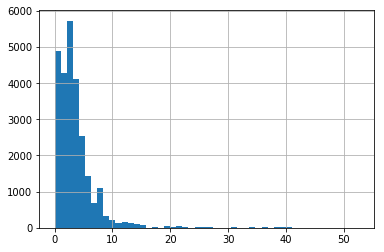

In [4]:
df['IM'].hist(bins=50)

# Calculate 13-15 authors' impact factor

In [30]:
df1315 = df[(df['PY']>=2013)&(df['PY']<=2015)]

In [31]:
dfa = df1315.AF.str.split(';', expand=True).\
                   join(df1315.fund_label).join(df1315.PY).join(df1315['IM'])
dfa.fillna(value=np.nan, inplace=True)

In [32]:
def df_new(df):
    temp=[]
    temp_n=[]
    for row in df.iterrows():
        index, data = row
        temp.append(data.tolist())
    for i in range(len(temp)):
        for j in range(len(temp[i])-3):
            temp_n.append([temp[i][j],temp[i][-3],temp[i][-2],temp[i][-1]])
    df_n = pd.DataFrame(temp_n, columns=['author','fund','PY','IM']).dropna()
    return df_n

In [33]:
df1315_authors=df_new(dfa)

In [34]:
df1315_authors.head()

,author,fund,PY,IM
0,"Lewallen, Eric Alexander",1,2015.0,0.0
1,"Riester, Scott M.",1,2015.0,0.0
2,"Bonin, Carolina A.",1,2015.0,0.0
3,"Kremers, Hilal Maradit",1,2015.0,0.0
4,"Dudakovic, Amel",1,2015.0,0.0


In [35]:
df1315_authors['author'] = df1315_authors['author'].str.lstrip()

In [36]:
dfa_if = pd.pivot_table(df1315_authors, index=['author', 'PY'], values='IM', aggfunc=np.sum)
dfa_if_unstacked = dfa_if.unstack()

In [38]:
dfa_if_unstacked['sum']=dfa_if_unstacked.sum(axis=1)

In [39]:
dfa_if_unstacked.columns = dfa_if_unstacked.columns.droplevel(0)

In [40]:
dfa_if_unstacked=dfa_if_unstacked.reset_index()

In [41]:
dfa_if_unstacked.columns=['author','2013if','2014if','2015if','sum']

In [42]:
dfa_if_unstacked.head()

,author,2013if,2014if,2015if,sum
0,"'t Hart, M. C.",NaN,NaN,4.560,4.560
1,"Aachmann, Finn L.",NaN,NaN,5.583,5.583
2,"Aachmann, Finn Lillelund",NaN,5.75,3.263,9.013
3,"Aalten, Pauline",NaN,2.04,NaN,2.040
4,"Aalto-Setala, Katriina",0.0,NaN,NaN,0.000


In [45]:
dfa_if_unstacked.to_csv('../data/13-15au_if.csv',index=False)